Data:Based 1

In [1]:
import pandas as pd
import numpy as np
import altair as alt

Reading the data in

In [2]:
pd.options.display.float_format = '{:.2f}'.format
no_division_before = True
no_append_before = True
no_reindex = True

In [3]:
df = pd.read_csv("./Data/prc_ppp_ind.tsv", sep= "\t")

In [4]:
categories = pd.read_excel(sheet_name= "61_Analytical_Categories", io ="./Data/categories.xlsx")

In [5]:
gdp = pd.read_excel(io = "./Data/gdp.xls")

Preprocess GDP To get merged

In [6]:
gdp.rename(columns= {"geo\\time":"country"}, inplace = True)

In [7]:
gdp.loc[gdp.country == "EU28","country"] = "EU27" #GDP has only EU28, other data only EU27

In [8]:
gdp.set_index("country",inplace = True)

In [9]:
gdp = gdp.apply(pd.to_numeric, errors='coerce', downcast = "integer")

In [10]:
gdp.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,
EU27,22900.00,23400.00,23700,23900,24400,24800,25600,26200,26300,25000,25500,25900,25700,25700,26100,26700,27100,27700.00,nan
EA19,26500.00,27000.00,27100,27100,27600,27900,28700,29400,29400,28000,28500,28900,28600,28500,28800,29300,29800,30400.00,nan
BE,30300.00,30500.00,30900,31000,32000,32500,33100,33900,33900,32900,33500,33800,33700,33600,33800,34200,34500,35000.00,35300.00
BG,3000.00,3200.00,3400,3600,3900,4200,4500,4800,5100,5000,5100,5300,5300,5400,5500,5700,6000,6300.00,nan
CZ,11200.00,11500.00,11800,12200,12800,13600,14500,15200,15400,14600,14900,15200,15100,15000,15400,16200,16500,17200.00,17600.00


Norming GDP By the EU Average

In [11]:
gdp_normed = gdp/gdp.loc["EU27",:]

In [12]:
gdp_normed.reset_index(inplace = True)

In [13]:
gdp_normed["type"], gdp_normed["item"], gdp_normed["Label"] = ["gdp","gdp","gdp"]
#Adding for merging purposes

In [14]:
gdp_normed.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,type,item,Label
0,EU27,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,nan,gdp,gdp,gdp
1,EA19,1.16,1.15,1.14,1.13,1.13,1.12,1.12,1.12,1.12,...,1.11,1.11,1.10,1.10,1.10,1.10,nan,gdp,gdp,gdp
2,BE,1.32,1.30,1.30,1.30,1.31,1.31,1.29,1.29,1.29,...,1.31,1.31,1.30,1.28,1.27,1.26,nan,gdp,gdp,gdp
3,BG,0.13,0.14,0.14,0.15,0.16,0.17,0.18,0.18,0.19,...,0.21,0.21,0.21,0.21,0.22,0.23,nan,gdp,gdp,gdp
4,CZ,0.49,0.49,0.50,0.51,0.52,0.55,0.57,0.58,0.59,...,0.59,0.58,0.59,0.61,0.61,0.62,nan,gdp,gdp,gdp


Splitting the wierd joined column

In [15]:
df["type"], df["item"], df["country"] = df.iloc[:,0].str.split(",").str

In [16]:
df.drop(columns="na_item,aggreg,geo\\time", inplace = True)

Fixing the damaged column names which have an unnecessery space.

In [17]:
df.loc[:,:"1995 "] = df.loc[:,:"1995 "].apply(pd.to_numeric, errors='coerce', downcast = "integer")

In [18]:
nr_columns = pd.to_numeric(df.columns[:-3]).to_list()
nr_columns = [str(col) for col in nr_columns]
other_columns = df.columns[-3:].to_list()

In [19]:
nr_columns.extend(other_columns)

In [20]:
df.columns = nr_columns

In [21]:
df.head() #The large talbe

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2001,2000,1999,1998,1997,1996,1995,type,item,country
0,11576.00,10740.00,10264.00,9969.00,9625.00,9586.00,9268.00,8997.00,8662.00,8800.00,...,4386.00,3780.00,3018.00,2279.00,1962.00,nan,nan,EXP_EUR,00,AL
1,369899.00,356238.00,344258.00,333146.00,323910.00,318653.00,310129.00,295897.00,288044.00,293762.00,...,220525.00,213606.00,203851.00,195012.00,187854.00,186968.00,184351.00,EXP_EUR,00,AT
2,16514.00,15288.00,14616.00,13988.00,13692.00,13407.00,13412.00,12969.00,12679.00,13048.00,...,nan,nan,nan,nan,nan,nan,nan,EXP_EUR,00,BA
3,439052.00,424660.00,411010.00,400087.00,392340.00,387500.00,379106.00,365100.00,348781.00,354066.00,...,265788.00,258222.00,244226.00,232869.00,224891.00,221664.00,221430.00,EXP_EUR,00,BE
4,51663.00,48129.00,45288.00,42824.00,41858.00,41947.00,41292.00,38231.00,37318.00,37200.00,...,15784.00,14306.00,12715.00,13358.00,9972.00,9741.00,14430.00,EXP_EUR,00,BG


In [22]:
gdp.reset_index(inplace = True)

In [23]:
gdp_normed = gdp_normed.round(decimals = 4)

Mergin information about the full categories description and GDP Data.
Thinking back, it would be more meaningful to keep the GDP and Price data separted.

In [24]:
categories.head()

,Code,Label
0,00,Gross Domestic Product
1,A01,Actual individual consumption
2,A0101,Food and non-alcoholic beverages
3,A010101,Food Overall
4,A01010101,Bread and cereals


In [25]:
df_full = pd.merge(df, categories, left_on = "item", right_on= "Code", how = "left" )

In [26]:
df_full.drop(columns= "Code", inplace = True)

In [27]:
if no_append_before:
    df_full = df_full.append(gdp_normed, ignore_index= True, sort = True)
    no_append_before = False

Filtering

In [28]:
df_full = df_full.loc[df_full.country != "LU",:]

In [29]:
df_full = df_full.melt(id_vars=["type", "item","country","Label"], var_name = "year")

In [30]:
df_full.year = pd.to_numeric(df_full.year)

df_full = df_full.loc[df_full.year.isin(range(2000,2018)),:]
# Chose some of hundred categories
df_full = df_full.loc[df_full.Label.isin(["Actual individual consumption",
                                          "Food Overall",
                                          "Meat",
                                          "Housing, water, electricity, gas and other fuels",
                                          "Restaurants and hotels",
                                          "Alcoholic beverages",
                                          "Households appliances",
                                          "Transport",                                          
                                          "gdp"]), :]
#We are interested in the price indexes of the countries relative to the EU27 Average
df_full = df_full.loc[df_full.type.isin(["PLI_EU27","gdp"])]

df_full = df_full.loc[np.logical_and(df_full.country.isin(gdp.country.unique()),df_full.country !="EA19") ,:]

In [31]:
#The percentual data were badly coded. Need to divede them by 100
if no_division_before:
    df_full.value = df_full.value.where(df_full.type == "gdp",df_full.value/100)
    no_division_before = True 

In [32]:
df_full.head()

,type,item,country,Label,year,value
285058,PLI_EU27,A01,AL,Actual individual consumption,2000,0.39
285059,PLI_EU27,A01,AT,Actual individual consumption,2000,1.03
285061,PLI_EU27,A01,BE,Actual individual consumption,2000,1.03
285062,PLI_EU27,A01,BG,Actual individual consumption,2000,0.31
285063,PLI_EU27,A01,CH,Actual individual consumption,2000,1.37


Using Groupy to quickly create indexes. Definetely no the best practice...

In [33]:
reindexed_full = df_full.groupby(["item","country", "Label","year"]).first()

Reading out GDP Data to use later for multiplication.

In [34]:
reindexed_gdp_normed = reindexed_full.loc["gdp",:].value.droplevel("Label")

In [35]:
purchasing_power = (reindexed_full.value/ reindexed_gdp_normed) ** -1

In [36]:
purchasing_power = purchasing_power.rename("PP")

In [37]:
purchasing_power = purchasing_power.groupby(["item","country", "Label","year"]).first() #Just to get right order of indexes

In [38]:
reindexed_gdp_normed.head()

country  year
AL       2000   0.07
         2001   0.08
         2002   0.08
         2003   0.09
         2004   0.09
Name: value, dtype: float64

Moving around the index levels so pd.concat works correctly

In [39]:
df_pp = pd.concat([reindexed_full, purchasing_power], axis = 1, ignore_index= False)

Finally, adding the GDP Data. Therefore, it was useless to merge them in beforehand

In [40]:
df_pp= df_pp.loc[df_pp.type != "gdp",:]
reindexed_gdp_normed = reindexed_gdp_normed.rename("gdp")

In [41]:
index_to_preserve = df_pp.index

In [42]:
df_fin = pd.merge(df_pp, reindexed_gdp_normed, on = ["country","year"],how = "left")

PD.Merge drops the index level values which are not present in all data. These need to be included once again

In [43]:
df_fin.index = df_pp.index

Altair can't work with indexes and needs columnar data instead.

In [44]:
df_fin = df_fin.reset_index()
df_fin.rename(columns = {"value":"PLI"}, inplace = True)

Charting

In [45]:
country_names = pd.read_excel("./Data/country_codes.xls")

In [46]:
df_fin = pd.merge(df_fin, country_names, on = "country", how ="left")

In [58]:
ch = alt.Chart(data = df_fin, width = 1000, height = 500
              )

In [69]:
## Year slider
slider = alt.binding_range(min=2000, max=2017, step=1)
select_year = alt.selection_single(name="year", fields=['year'], bind=slider)

#Category Slider
item_dropdown = alt.binding_select(options=df_fin.Label.unique().tolist())
item_select = alt.selection_single(fields=['Label'], bind=item_dropdown, name="Category")

chart = ch.mark_point(
).encode(alt.Y("gdp:Q", axis= alt.Axis(format='%'), scale = alt.Scale(domain =[0,df_fin.gdp.max()],  clamp = True), title = "Nominal GDP compared to the EU average"),
         alt.X("PLI:Q",axis= alt.Axis(format='%') , scale = alt.Scale(domain = [0,df_fin.PLI.max()], clamp = True), title = "Price Level compared to the EU average"),
         alt.Size("PP:Q", scale = alt.Scale(domain =[0,df_fin.PP.max()], clamp = True), legend = alt.Legend(orient = "top-left",title = "Purchasing Power")),
         alt.Color("name:N", scale = alt.Scale(domain =df_fin.name.unique().tolist() ,), legend = None),
         tooltip=[alt.Tooltip('name', title='Country'), alt.Tooltip('year', title='Year'),
                  alt.Tooltip('gdp', format='.2%', title='Nominal GDP/EU average'),
                  alt.Tooltip('PLI', format='.2%', title='Price Level/EU average'),
                  alt.Tooltip('PP', format='.2%', title='Purchasing Power/EU average')]
).add_selection(
    select_year
).transform_filter(
    select_year
).add_selection(
    item_select
).transform_filter(
    item_select
)


text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=7, opacity = .9
).encode(
    text='country',
).configure_axis(labelFontSize = 20, titleFontSize = 20
              ).configure_legend(labelFontSize = 20, titleFontSize = 12
              ).configure_scale(minFontSize = 20, maxFontSize = 100)


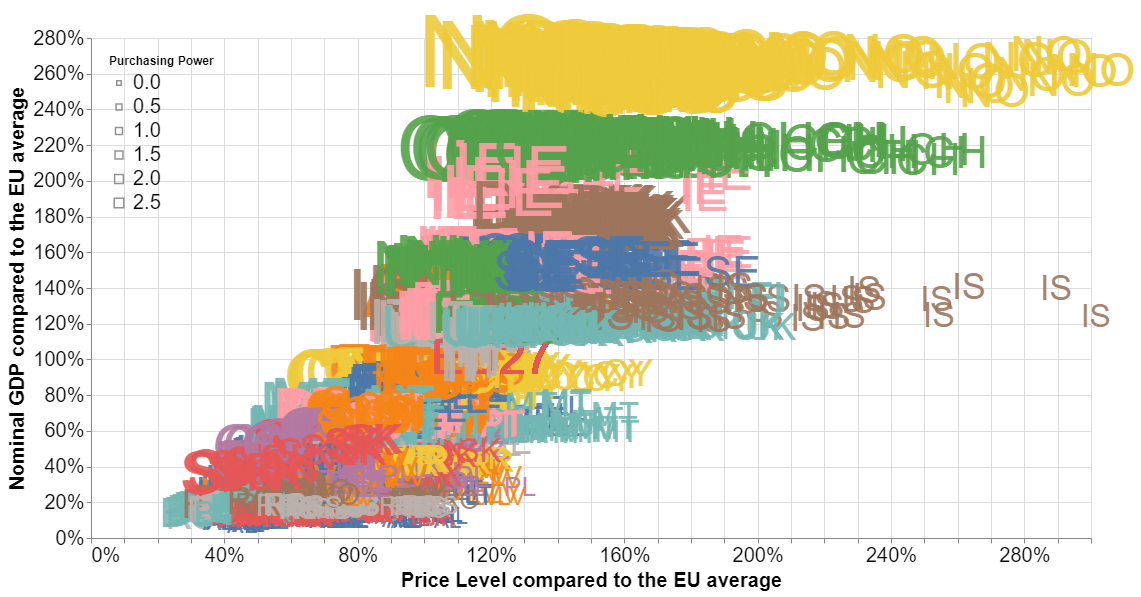

In [70]:
text

In [71]:
text.save("./Results/data_based1.json")

Phone Version

In [72]:
ch_phone = alt.Chart(data = df_fin, width = 300 ,height = 450
              ).configure_axis(labelFontSize = 15, titleFontSize = 15
              ).configure_legend(labelFontSize = 15, titleFontSize = 10
              ).configure_scale(minFontSize = 13, maxFontSize = 20)

In [73]:
## Year slider
slider = alt.binding_range(min=2000, max=2017, step=1)
select_year = alt.selection_single(name="year", fields=['year'], bind=slider)

#Category Slider
item_dropdown = alt.binding_select(options=df_fin.Label.unique().tolist())
item_select = alt.selection_single(fields=['Label'], bind=item_dropdown, name="Category")

chart_phone = ch_phone.mark_point(
).encode(alt.Y("gdp:Q", axis= alt.Axis(format='%'), scale = alt.Scale(domain =[0,df_fin.gdp.max()],  clamp = True), title = "Nominal GDP compared to the EU average"),
         alt.X("PLI:Q",axis= alt.Axis(format='%') , scale = alt.Scale(domain = [0,df_fin.PLI.max()], clamp = True), title = "Price Level compared to the EU average"),
         alt.Size("PP:Q", scale = alt.Scale(domain =[0,df_fin.PP.max()], clamp = True), legend = alt.Legend(orient = "top-left",title = "Purchasing Power")),
         alt.Color("name:N", scale = alt.Scale(domain =df_fin.name.unique().tolist() ,), legend = None),
         tooltip=[alt.Tooltip('name', title='Country'), alt.Tooltip('year', title='Year'),
                  alt.Tooltip('gdp', format='.2%', title='Nominal GDP/EU average'),
                  alt.Tooltip('PLI', format='.2%', title='Price Level/EU average'),
                  alt.Tooltip('PP', format='.2%', title='Purchasing Power/EU average')]
).add_selection(
    select_year
).transform_filter(
    select_year
).add_selection(
    item_select
).transform_filter(
    item_select
)


text_phone = chart_phone.mark_text(
    align='left',
    baseline='middle',
    dx=7, opacity = .9
).encode(
    text='country',
)


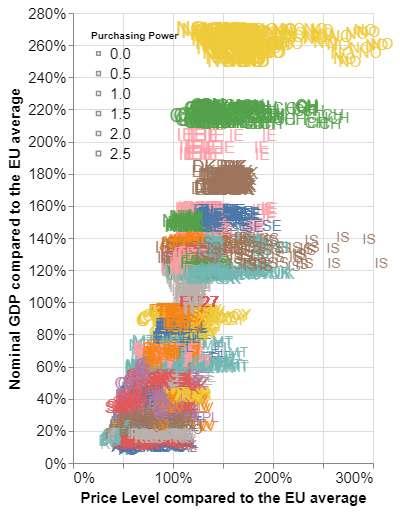

In [74]:
text_phone

In [75]:
text_phone.save("./Results/data_based1_phone.json")